# Recherche des racines d'équations non linéaires

**Nom :Diamoutene  
**Prénom :Zana  

On commence par importer les bibliothèques qui vont bien :

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

## Recherche incrémentale

Dans cet exercice, nous allons nous intéresser à la résolution "approchée" de l'équation $f(x)=x^3 −10x^2 +5=0$

- Ecrire la fonction `f(x)` (fonction python classique) qui correspond à la fonction ci-dessus.

Tracer le graphe de la fonction $f$ sur l'intervalle $[-100,100]$ (on fera figurer l'axe en rouge ci-dessous).

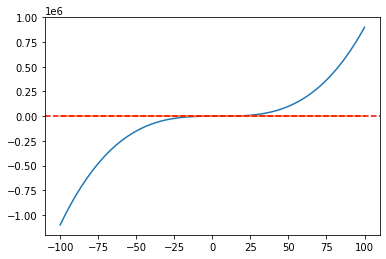

In [11]:
# A écrire
def f(x):
    return x**3 - 10*x**2 +5

x_values = np.linspace(-100, 100, 1000)
y_values = f(x_values)

plt.plot(x_values, y_values, label='f(x) = x^3 - 10x^2 + 5')
plt.plot(x_values,np.zeros_like(y_values),label='Axe x')
plt.axhline( color='red', linestyle='--')  



- A l'aide d'une boucle que vous devez écire, rechercher les racines de $f(x)$ sur l'intervalle [-100,100]  (c'est à dire les valeurs t telles que f(t)=0) en utilisant une méthode de recherche incrémentale, en explorant l'intervalle par pas de 1e-2. Pour réaliser cela,on écrira :
    - Une fonction qui prend en argument les bornes de l'intervalle et le pas, et qui renvoie un tableau numpy à deux dimensions: on aura 2 lignes de N colonnes (s'il y a N racines) : pour chaque colonne il y aura dans la première ligne la borne inférieure et pour la deuxième ligne la borne supérieure pour chacun des N intervalles. 

    - Une boucle qui parcourrera l'intervalle de travail de pas en pas et testera si $f(x) \times f(x+pas)<0$

- Mesurer le temps de calcul (pour cela, précéder l'appel de la commande  `%timeit` : ce qui donnera l'appel `%timeit recherche(-100,100,1e-2)`).
Attention du coup le calcul n'est pas instantané car plusieurs boucles sont faites! (vous testerez d'abord votre fonction et ensuite vous ajoutez le `%timeit`.

In [12]:


# Définition de la fonction f(x)
def f(x):
    return x**3 - 10*x**2 + 5

# Fonction de recherche des racines
def recherche(borne_inf, borne_sup, pas):
    intervals = []  # Liste pour stocker les intervalles avec changement de signe
    
    # Boucle pour parcourir l'intervalle de travail
    for x in np.arange(borne_inf, borne_sup, pas):
        if f(x) * f(x + pas) < 0:
            intervals.append([x, x + pas])
    
    return np.array(intervals)

# Mesurer le temps de calcul
%timeit recherche(-100, 100, 1e-2)

# Exécuter la fonction et afficher les résultats
intervals = recherche(-100, 100, 1e-2)
print("Intervalle(s) contenant des racines :")
print(intervals)


43.8 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Intervalle(s) contenant des racines :
[[-0.69 -0.68]
 [ 0.73  0.74]
 [ 9.94  9.95]]


- Ecrire ensuite une fonction qui réalise la même opération mais sans boucle, en se basant sur les tableaux de numpy (utiliser arange, where.....)
Mesurer le temps et comparer.

In [13]:
# Définition de la fonction f(x)
def f(x):
    return x**3 - 10*x**2 + 5

# Fonction de recherche des racines sans boucle
def recherche_sans_boucle(borne_inf, borne_sup, pas):
    x_values = np.arange(borne_inf, borne_sup, pas)
    fx = f(x_values)
    fx_plus_pas = f(x_values + pas)
    sign_changes = np.where(fx * fx_plus_pas < 0)
    intervals = np.vstack((x_values[sign_changes], x_values[sign_changes] + pas))
    return intervals.T

# Mesurer le temps de calcul
%timeit recherche_sans_boucle(-100, 100, 1e-2)

# Exécuter la fonction et afficher les résultats
intervals = recherche_sans_boucle(-100, 100, 1e-2)
print("Intervalle(s) contenant des racines :")
print(intervals)

1.3 ms ± 6.04 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Intervalle(s) contenant des racines :
[[-0.69 -0.68]
 [ 0.73  0.74]
 [ 9.94  9.95]]


- Refaire le graphique de la première question en limitant le dessin aux valeurs de x dans $[-1,10]$ (on changera le linspace).

- Ajouter sur le schéma les milieux des intervalles obtenus avec les recherches ci-dessus.

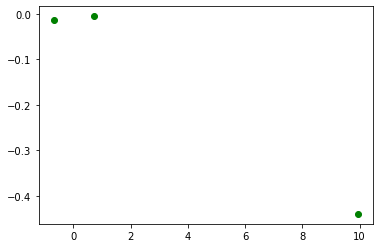

In [14]:
# Milieux des intervalles 
# a compléter ...
racines = recherche_vec(-1, 10, 1e-2)  # Recherche des racines en utilisant la fonction sans boucle
milieux = (racines[0] + racines[1]) / 2  # Calcul des milieux des intervalles
plt.scatter(milieux, f(milieux), color='green', label='Milieux des intervalles')  # Tracé des milieux des intervalles


# Graphique
# à compléter ...

## Recherche par dichotomie (ou bissection)

- Ecrire une fonction de recherche d'approximation de racine par dichotomie.Vous devez ici écrire une boucle. Cette fonction affinera la recherche d'une racine, à partir d'un intervalle qui ne contient qu'une unique racine. La fonction prendra comme argument les bornes inférieures et supérieures de l'intervalle à explorer, ainsi qu'un critère d'arrêt `xtol` qui représente la précision souhaitée (largeur de l'intervalle final).

- Nous prendrons comme exemple la fonction précédente ($f(x)=x^3 −10x^2 +5=0$) et nous intéresserons à la racine qui se trouve dans l'intervalle $[0.73, 0.74]$.

Commencer par tracer le graphe de la fonction sur cet intervalle  puis calculer la racine par dichotomie.
On évaluera le temps d'execution  pour cette recherche.

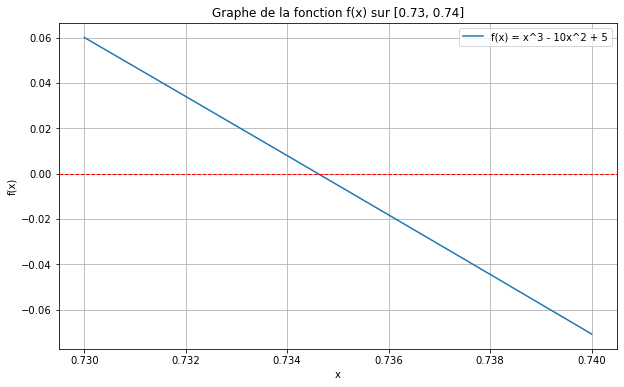

10.3 µs ± 228 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Approximation de la racine par dichotomie: 0.7346035766601563


In [17]:
# Définition de la fonction f(x)
def f(x):
    return x**3 - 10*x**2 + 5

# Fonction de recherche d'approximation de racine par dichotomie
def dichotomie(borne_inf, borne_sup, xtol):
    # Initialisation des bornes de l'intervalle
    a = borne_inf
    b = borne_sup
    
    # Boucle de recherche de la racine
    while (b - a) > xtol:
        # Calcul du point milieu
        c = (a + b) / 2
        
        # Vérification du signe aux extrémités et au milieu
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    # Retourner le point milieu de l'intervalle final comme approximation de la racine
    return (a + b) / 2

# Tracer le graphe de la fonction sur l'intervalle [0.73, 0.74]
x_values = np.linspace(0.73, 0.74, 100)
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = x^3 - 10x^2 + 5')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Ajouter l'axe des abscisses (y=0) en rouge
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graphe de la fonction f(x) sur [0.73, 0.74]')
plt.grid(True)
plt.legend()
plt.show()

# Calcul de la racine par dichotomie
%timeit racine_dichotomie = dichotomie(0.73, 0.74, 1e-6)
racine_dichotomie = dichotomie(0.73, 0.74, 1e-6)
print("Approximation de la racine par dichotomie:", racine_dichotomie)

In [26]:
def f(x):
    return x**3 - 10*x**2 + 5

def dicho(xmin, xmax, xtol):
    a = xmin
    b = xmax
    
    while (b - a) > xtol:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    
    return (a, b)

%timeit dicho(0.73, 0.74, 1e-7)
intervalle = dicho(0.73, 0.74, 1e-7)
sol = (intervalle[0] + intervalle[1]) / 2

print('intervalle :', intervalle)
print('solution : ', sol)


17.4 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
intervalle : (0.734603500366211, 0.7346035766601563)
solution :  0.7346035385131837


- Effectuer la même recherche de racine,sans boucle, mais en utilisant la librairie `scipy` (fonction `scipy.optimize.bisect`).

- On calculera le temps d'exécution de cette méthode et on comparera avec la méthode précédente.

In [19]:
from scipy.optimize import bisect
%timeit racine_bisect = bisect(f, 0.73, 0.74, xtol=1e-6)
racine_bisect = bisect(f, 0.73, 0.74, xtol=1e-6)
print("Approximation de la racine par la méthode de dichotomie de scipy.optimize.bisect:", racine_bisect)



5.62 µs ± 16.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
Approximation de la racine par la méthode de dichotomie de scipy.optimize.bisect: 0.7346038818359374


## Méthode de recherche de Newton-Raphson

- Comme précédement, on implémentera (en écrivant la boucle) la méthode de Newton-Raphson (voir cours) puis on utilisera celle de scipy en utilisant la librairie `scipy` (fonction `scipy.optimize.newton`).
  
Le critère d'arret sera exprimé sur les valeurs de f(x), avec $|f(x)|<tol$. 

- Comparer les temps d'éxécution.



In [25]:
#  A compléter ...

#  A compléter ...

def newton( x, tol=0.000001):
    #  A compléter ...
    #  A compléter ...
#  A compléter ...
sol = newton((0.73+ 0.74)/2,1e-10)
print('solution : ',sol)

IndentationError: expected an indented block after function definition on line 5 (3389140703.py, line 9)

In [24]:
#  A compléter ...

#  A compléter ...

## Combinaison de méthodes 
- Combiner la recherche itérative avec la recherche de Newton-Raphson pour trouver précisément les 3 racines de la fonction $f$. 

In [18]:
import scipy as sp
import scipy.optimize
# Afficher Racines de la recherche itérative
# A compléter ...
# Afficher Racines par scipy.optimize.newton 
# A compléter ...

Sols :  [-0.685  0.735  9.945]
Sols : [-0.6840945657036899, 0.7346035077893033, 9.949491057914384]
